In [2]:
# 데이터로더 생성을 위한 라이브러리 불러오기
from mmcv.utils import Config
from mmseg.datasets import build_dataset, build_dataloader
import matplotlib.pyplot as plt
import torch

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pl_ssun. Use `wandb login --relogin` to force relogin
2023-01-03 18:40:10,028 - mmseg - INFO - Loaded 2617 images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


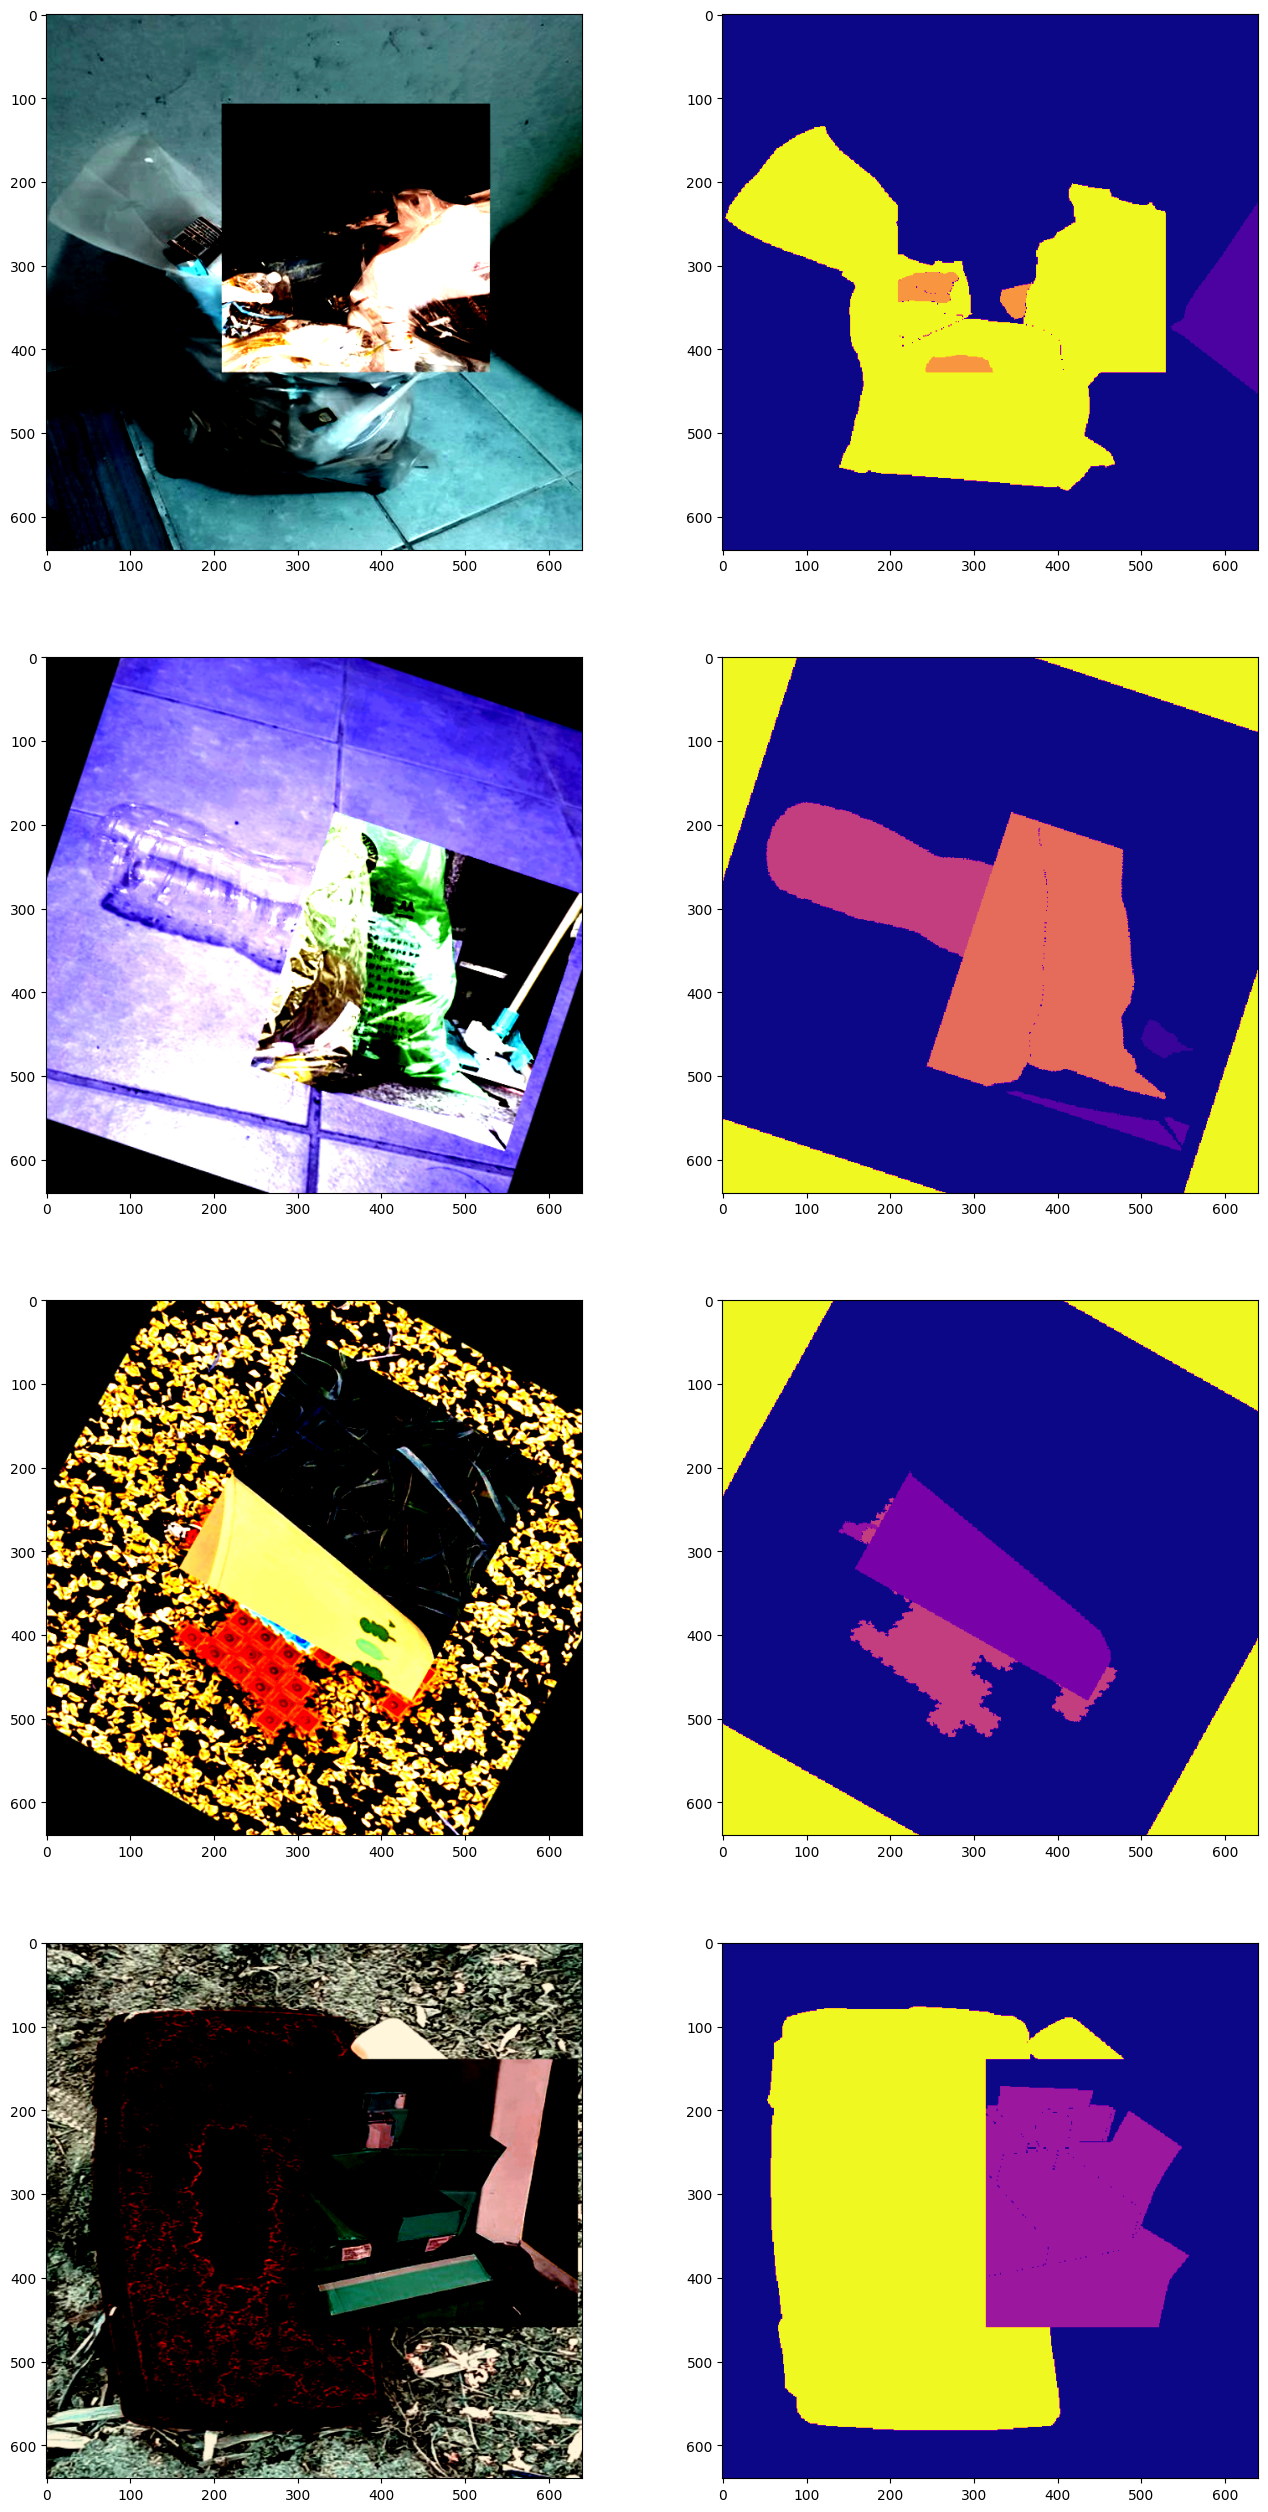

In [2]:
## ver.train
# config file 불러오기 _ datasets 부분
# how_much : 처음 몇개를 볼 것인가?
config_file = '/opt/ml/level2_semanticsegmentation_cv-level2-cv-03/CV03/configs/upernet_beit/upbeit_Final_.py'
how_much = 4

# config를 cfg로 관리 & 데이터셋 생성
cfg = Config.fromfile(config_file)
datasets = build_dataset(cfg.data.train)

print(cfg)

# # 초기 8개 이미지를 mask와 함께 한번에 관찰
# fig = plt.figure(figsize=(16, 16*(how_much/2)))
# for idx, val in enumerate(datasets):
#     ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
#     img = val['img']._data.permute(1, 2, 0)
#     img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
#     ax1.imshow(img_rgb)
    
#     ax2 = fig.add_subplot(how_much, 2, 2*idx+2)
#     mask = torch.clamp(val['gt_semantic_seg']._data.permute(1, 2, 0)*20, max=255)
#     ax2.imshow(mask, cmap='plasma')
    
#     if idx == how_much-1:
#         break

# plt.show()

2023-01-03 12:41:23,563 - mmseg - INFO - Loaded 655 images


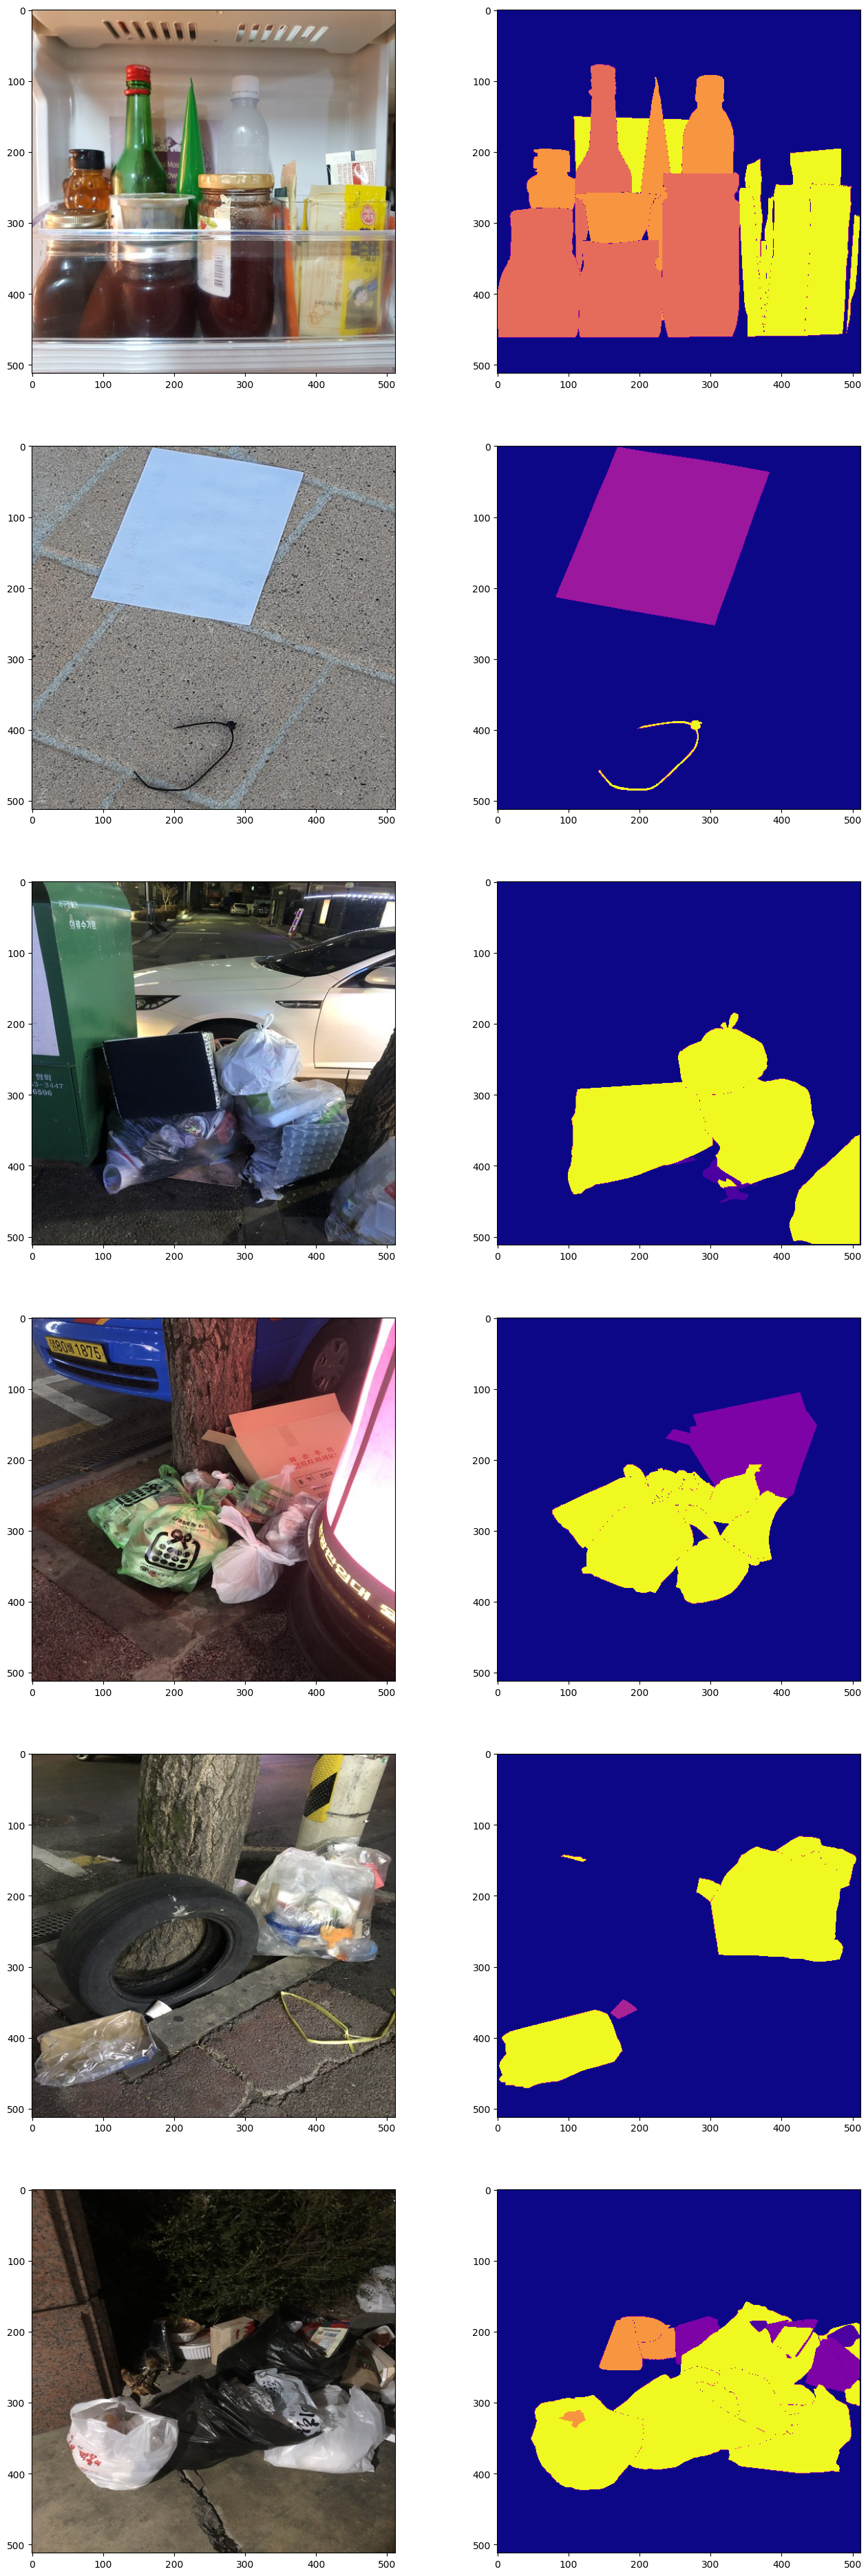

In [7]:
## ver.valid
# config file 불러오기 _ datasets 부분
# how_much : 처음 몇개를 볼 것인가?
config_file = '/opt/ml/level2_semanticsegmentation_cv-level2-cv-03/CV03/configs/Augmentation/Aug_NCp384Cla.py'
how_much = 6

# config를 cfg로 관리 & 데이터셋 생성
cfg = Config.fromfile(config_file)

valid_pipeline = [
    dict(type="LoadImageFromFile"),
    dict(type="LoadAnnotations"),
    dict(type="RandomFlip", prob=0),
    dict(type="DefaultFormatBundle"),
    dict(type="Collect", keys=["img", "gt_semantic_seg"]),
]
cfg.data.val.pipeline = valid_pipeline
datasets = build_dataset(cfg.data.val)


# 초기 8개 이미지를 mask와 함께 한번에 관찰
fig = plt.figure(figsize=(16, 16*(how_much/2)))
for idx, val in enumerate(datasets):
    ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
    img = val['img']._data.permute(1, 2, 0)
    img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
    ax1.imshow(img_rgb)
    
    ax2 = fig.add_subplot(how_much, 2, 2*idx+2)
    mask = torch.clamp(val['gt_semantic_seg']._data.permute(1, 2, 0)*20, max=255)
    ax2.imshow(mask, cmap='plasma')
    
    if idx == how_much-1:
        break

plt.show()

In [2]:
## ver.valid
# config file 불러오기 _ datasets 부분
# how_much : 처음 몇개를 볼 것인가?
config_file = '/opt/ml/level2_semanticsegmentation_cv-level2-cv-03/CV03/configs/Augmentation/Aug_NCp384Cla.py'
how_much = 1

# config를 cfg로 관리 & 데이터셋 생성
cfg = Config.fromfile(config_file)
ROOT = '/opt/ml/input/data' 

valid_pipeline = [
    dict(type="RandomFlip", prob=0),
    #dict(type='RandomMosaic', prob=1),
    dict(type="CopyPaste", prob=1, mode='all', patch_scale_ratio=0.75),
    dict(type="DefaultFormatBundle"),
    dict(type="Collect", keys=["img", "gt_semantic_seg"])
]

valid_dataset = dict(
    type='MultiImageMixDataset',
    dataset=dict(
        classes=cfg.classes,
        palette=cfg.palette,
        type="CustomDataset",
        # reduce_zero_label=False
        data_root=ROOT,
        img_dir=cfg.cfg['valid_img_path'],
        ann_dir=cfg.cfg['valid_mask_path'],
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations'),
        ]
    ),
    pipeline=valid_pipeline)

cfg.data.val = valid_dataset
datasets = build_dataset(cfg.data.val)


# 초기 8개 이미지를 mask와 함께 한번에 관찰
fig = plt.figure(figsize=(16, 16*(how_much/2)))
for idx, val in enumerate(datasets):
    ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
    img = val['img']._data.permute(1, 2, 0)
    img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
    ax1.imshow(img_rgb)
    
    ax2 = fig.add_subplot(how_much, 2, 2*idx+2)
    mask = torch.clamp(val['gt_semantic_seg']._data.permute(1, 2, 0)*20, max=255)
    ax2.imshow(mask, cmap='plasma')
    
    if idx == how_much-1:
        break

plt.show()

2023-01-04 02:29:19,446 - mmseg - INFO - Loaded 655 images


position_img : [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(512, 512, 3)
position_mask : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(512, 512)
tl_posit : 73, 81
------------------------------
patch_img : [[[ 84  95 109]
  [ 96 107 120]
  [127 139 151]
  ...
  [207 212 211]
  [206 211 210]
  [184 189 188]]

 [[ 81  92 106]
  [ 93 104 117]
  [118 130 142]
  ...
  [202 207 206]
  [193 199 198]
  [162 168 167]

<Figure size 1600x800 with 0 Axes>

In [7]:
for i in datasets:
    print(i)
    break
i

{'img_info': {'filename': '0000.jpg', 'ann': {'seg_map': '0000.png'}}, 'ann_info': {'seg_map': '0000.png'}, 'seg_fields': ['gt_semantic_seg'], 'img_prefix': '/opt/ml/input/data/valid/images/', 'seg_prefix': '/opt/ml/input/data/valid/mask', 'label_map': None, 'filename': '/opt/ml/input/data/valid/images/0000.jpg', 'ori_filename': '0000.jpg', 'img': array([[[158, 189, 212],
        [163, 194, 217],
        [160, 189, 216],
        ...,
        [108, 132, 160],
        [108, 132, 160],
        [107, 131, 159]],

       [[168, 198, 223],
        [158, 188, 213],
        [155, 184, 211],
        ...,
        [107, 131, 159],
        [107, 131, 159],
        [107, 131, 159]],

       [[161, 190, 217],
        [165, 194, 221],
        [162, 191, 218],
        ...,
        [106, 131, 157],
        [106, 130, 158],
        [105, 129, 157]],

       ...,

       [[228, 222, 227],
        [226, 222, 227],
        [228, 222, 227],
        ...,
        [127, 117, 130],
        [130, 117, 131],
    

{'img_info': {'filename': '0000.jpg', 'ann': {'seg_map': '0000.png'}},
 'ann_info': {'seg_map': '0000.png'},
 'seg_fields': ['gt_semantic_seg'],
 'img_prefix': '/opt/ml/input/data/valid/images/',
 'seg_prefix': '/opt/ml/input/data/valid/mask',
 'label_map': None,
 'filename': '/opt/ml/input/data/valid/images/0000.jpg',
 'ori_filename': '0000.jpg',
 'img': array([[[158, 189, 212],
         [163, 194, 217],
         [160, 189, 216],
         ...,
         [108, 132, 160],
         [108, 132, 160],
         [107, 131, 159]],
 
        [[168, 198, 223],
         [158, 188, 213],
         [155, 184, 211],
         ...,
         [107, 131, 159],
         [107, 131, 159],
         [107, 131, 159]],
 
        [[161, 190, 217],
         [165, 194, 221],
         [162, 191, 218],
         ...,
         [106, 131, 157],
         [106, 130, 158],
         [105, 129, 157]],
 
        ...,
 
        [[228, 222, 227],
         [226, 222, 227],
         [228, 222, 227],
         ...,
         [127, 11